### 1. Generate images with the original model

100%|██████████| 50/50 [00:01<00:00, 29.77it/s]


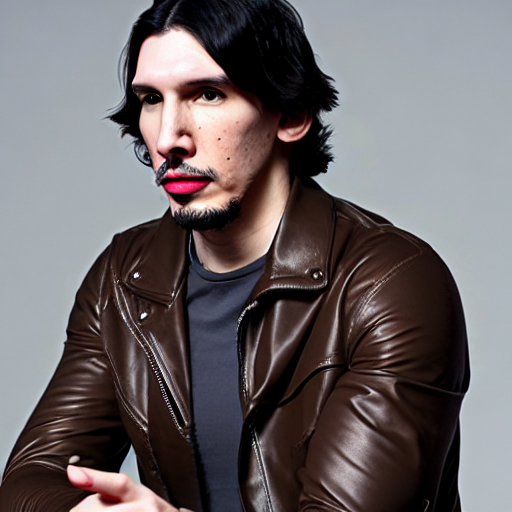

In [16]:
import torch
from diffusers import StableDiffusionPipeline

model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda"

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to(device)
pipe.safety_checker = None
pipe.requires_safety_checker = False
torch.Generator(device=device).manual_seed(42)
    
prompt = "a photo of adam-driver"
image = pipe(prompt).images[0]  
    
display(image)

del pipe
torch.cuda.empty_cache()

### 2. Data preparation for finetuning

In [9]:
import subprocess, os
config_path = "configs/celebrity/erase_cele_5.yaml"
cuda_num = 0

subprocess.run(
    ["python", "data_preparation_transformers.py", config_path],
    env={"CUDA_VISIBLE_DEVICES": str(cuda_num), **dict(**os.environ)}
)


/home/shilin1/anaconda3/envs/mace/lib/python3.10/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/home/shilin1/anaconda3/envs/mace/lib/python3.10/site-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit an

Generating training data for concept 1: adam-driver...
Inferencing: a photo of the adam driver


100%|██████████| 30/30 [00:16<00:00,  1.87it/s]


Generating training data for concept 2: adriana-lima...
Inferencing: a photo of the adriana lima


100%|██████████| 30/30 [00:15<00:00,  1.92it/s]


Generating training data for concept 3: amber-heard...
Inferencing: a photo of the amber heard


100%|██████████| 30/30 [00:15<00:00,  1.92it/s]


Generating training data for concept 4: amy-adams...
Inferencing: a photo of the amy adams


100%|██████████| 30/30 [00:15<00:00,  1.91it/s]


Generating training data for concept 5: andrew-garfield...
Inferencing: a photo of the andrew garfield


100%|██████████| 30/30 [00:15<00:00,  1.91it/s]


./data/5cele/adam driver/a-photo-of-the-adam-driver_0.jpg
255 0
./data/5cele/adam driver/a-photo-of-the-adam-driver_1.jpg
255 0
./data/5cele/adam driver/a-photo-of-the-adam-driver_2.jpg
255 0
./data/5cele/adam driver/a-photo-of-the-adam-driver_3.jpg
255 0
./data/5cele/adam driver/a-photo-of-the-adam-driver_4.jpg
255 0
./data/5cele/adam driver/a-photo-of-the-adam-driver_5.jpg
255 0
./data/5cele/adam driver/a-photo-of-the-adam-driver_6.jpg
255 0
./data/5cele/adam driver/a-photo-of-the-adam-driver_7.jpg
255 0
./data/5cele/adriana lima/a-photo-of-the-adriana-lima_0.jpg
255 0
./data/5cele/adriana lima/a-photo-of-the-adriana-lima_1.jpg
255 0
./data/5cele/adriana lima/a-photo-of-the-adriana-lima_2.jpg
255 0
./data/5cele/adriana lima/a-photo-of-the-adriana-lima_3.jpg
255 0
./data/5cele/adriana lima/a-photo-of-the-adriana-lima_4.jpg
255 0
./data/5cele/adriana lima/a-photo-of-the-adriana-lima_5.jpg
255 0
./data/5cele/adriana lima/a-photo-of-the-adriana-lima_6.jpg
255 0
./data/5cele/adriana lima/

CompletedProcess(args=['python', 'data_preparation_transformers.py', 'configs/celebrity/erase_cele_5.yaml'], returncode=0)

### 3. Finetuning for concept erasure (based on configuration)

In [12]:
import subprocess, os

subprocess.run(
    ["python", "training.py", config_path],
    env={"CUDA_VISIBLE_DEVICES": str(cuda_num), **dict(**os.environ)}
)


/home/shilin1/anaconda3/envs/mace/lib/python3.10/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/home/shilin1/anaconda3/envs/mace/lib/python3.10/site-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit an

Using relation-focal importance sampling, which can make training more efficient
                  and is particularly beneficial in erasing mass concepts with overlapping terms.
Concept 0: A drawing capturing the essence of adam driver


Steps: 100%|██████████| 50/50 [00:14<00:00,  3.45it/s, loss=24.1, lr=0.0001]/home/shilin1/anaconda3/envs/mace/lib/python3.10/site-packages/diffusers/models/attention_processor.py:382: FutureWarning: `set_processor to offload LoRA` is deprecated and will be removed in version 0.26.0. In detail, removing LoRA layers via calling `set_default_attn_processor` is deprecated. Please make sure to call `pipe.unload_lora_weights()` instead.
  deprecate(
02/13/2025 17:37:47 - INFO - src.cfr_lora_training - ***** Running training *****
02/13/2025 17:37:47 - INFO - src.cfr_lora_training -   Num examples = 8
02/13/2025 17:37:47 - INFO - src.cfr_lora_training -   Num batches each epoch = 8
02/13/2025 17:37:47 - INFO - src.cfr_lora_training -   Num Epochs = 7
02/13/2025 17:37:47 - INFO - src.cfr_lora_training -   Instantaneous batch size per device = 1
02/13/2025 17:37:47 - INFO - src.cfr_lora_training -   Total train batch size (w. parallel, distributed & accumulation) = 1
02/13/2025 17:37:47 - INFO 

Using relation-focal importance sampling, which can make training more efficient
                  and is particularly beneficial in erasing mass concepts with overlapping terms.
Concept 1: A drawing capturing the essence of adriana lima



Steps: 100%|██████████| 50/50 [00:14<00:00,  3.41it/s, loss=14.8, lr=0.0001]02/13/2025 17:38:02 - INFO - src.cfr_lora_training - ***** Running training *****
02/13/2025 17:38:02 - INFO - src.cfr_lora_training -   Num examples = 8
02/13/2025 17:38:02 - INFO - src.cfr_lora_training -   Num batches each epoch = 8
02/13/2025 17:38:02 - INFO - src.cfr_lora_training -   Num Epochs = 7
02/13/2025 17:38:02 - INFO - src.cfr_lora_training -   Instantaneous batch size per device = 1
02/13/2025 17:38:02 - INFO - src.cfr_lora_training -   Total train batch size (w. parallel, distributed & accumulation) = 1
02/13/2025 17:38:02 - INFO - src.cfr_lora_training -   Gradient Accumulation steps = 1
02/13/2025 17:38:02 - INFO - src.cfr_lora_training -   Total optimization steps = 50
Steps:   0%|          | 0/50 [00:00<?, ?it/s]

Using relation-focal importance sampling, which can make training more efficient
                  and is particularly beneficial in erasing mass concepts with overlapping terms.
Concept 2: amber heard during sunset/sunrise


Steps: 100%|██████████| 50/50 [00:14<00:00,  3.42it/s, loss=21.9, lr=0.0001]02/13/2025 17:38:16 - INFO - src.cfr_lora_training - ***** Running training *****
02/13/2025 17:38:16 - INFO - src.cfr_lora_training -   Num examples = 8
02/13/2025 17:38:16 - INFO - src.cfr_lora_training -   Num batches each epoch = 8
02/13/2025 17:38:16 - INFO - src.cfr_lora_training -   Num Epochs = 7
02/13/2025 17:38:16 - INFO - src.cfr_lora_training -   Instantaneous batch size per device = 1
02/13/2025 17:38:16 - INFO - src.cfr_lora_training -   Total train batch size (w. parallel, distributed & accumulation) = 1
02/13/2025 17:38:16 - INFO - src.cfr_lora_training -   Gradient Accumulation steps = 1
02/13/2025 17:38:16 - INFO - src.cfr_lora_training -   Total optimization steps = 50

Steps: 100%|██████████| 50/50 [00:14<00:00,  3.48it/s, loss=21.9, lr=0.0001]

Steps:   0%|          | 0/50 [00:00<?, ?it/s]

Using relation-focal importance sampling, which can make training more efficient
                  and is particularly beneficial in erasing mass concepts with overlapping terms.
Concept 3: amy adams in a snapshot



Steps: 100%|██████████| 50/50 [00:14<00:00,  3.45it/s, loss=15.5, lr=0.0001]02/13/2025 17:38:30 - INFO - src.cfr_lora_training - ***** Running training *****
02/13/2025 17:38:30 - INFO - src.cfr_lora_training -   Num examples = 8
02/13/2025 17:38:30 - INFO - src.cfr_lora_training -   Num batches each epoch = 8
02/13/2025 17:38:30 - INFO - src.cfr_lora_training -   Num Epochs = 7
02/13/2025 17:38:30 - INFO - src.cfr_lora_training -   Instantaneous batch size per device = 1
02/13/2025 17:38:30 - INFO - src.cfr_lora_training -   Total train batch size (w. parallel, distributed & accumulation) = 1
02/13/2025 17:38:30 - INFO - src.cfr_lora_training -   Gradient Accumulation steps = 1
02/13/2025 17:38:30 - INFO - src.cfr_lora_training -   Total optimization steps = 50
Steps:   0%|          | 0/50 [00:00<?, ?it/s]

Using relation-focal importance sampling, which can make training more efficient
                  and is particularly beneficial in erasing mass concepts with overlapping terms.
Concept 4: A shot of andrew garfield


Loading pipeline components...:  57%|█████▋    | 4/7 [00:00<00:00, 11.11it/s]Some weights of the model checkpoint were not used when initializing UNet2DConditionModel: 
 ['down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_k.lora_layer.down.weight, down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_k.lora_layer.up.weight, down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_out.0.lora_layer.down.weight, down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_out.0.lora_layer.up.weight, down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_q.lora_layer.down.weight, down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_q.lora_layer.up.weight, down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_v.lora_layer.down.weight, down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_v.lora_layer.up.weight, down_blocks.0.attentions.0.transformer_blocks.0.attn2.to_k.lora_layer.down.weight, down_blocks.0.attentions.0.transformer_blocks.0.attn2.to_k.lora_layer.up.weight, 

============================== Concept 1: adam driver ==============================
============================== Concept 2: adriana lima ==============================


You have saved the LoRA weights using the old format. To convert the old LoRA weights to the new format, you can first load them in a dictionary and then create a new dictionary like the following: `new_state_dict = {f'unet.{module_name}': params for module_name, params in old_state_dict.items()}`.


============================== Concept 3: amber heard ==============================


You have saved the LoRA weights using the old format. To convert the old LoRA weights to the new format, you can first load them in a dictionary and then create a new dictionary like the following: `new_state_dict = {f'unet.{module_name}': params for module_name, params in old_state_dict.items()}`.


============================== Concept 4: amy adams ==============================


You have saved the LoRA weights using the old format. To convert the old LoRA weights to the new format, you can first load them in a dictionary and then create a new dictionary like the following: `new_state_dict = {f'unet.{module_name}': params for module_name, params in old_state_dict.items()}`.


============================== Concept 5: andrew garfield ==============================


You have saved the LoRA weights using the old format. To convert the old LoRA weights to the new format, you can first load them in a dictionary and then create a new dictionary like the following: `new_state_dict = {f'unet.{module_name}': params for module_name, params in old_state_dict.items()}`.
100%|██████████| 32/32 [00:05<00:00,  6.35it/s]


CompletedProcess(args=['python', 'training.py', 'configs/celebrity/erase_cele_5.yaml'], returncode=0)

### 4. Sampling with finetuned model

In [13]:
import subprocess
import os

cmd = [
    "python", "inference.py",
    "--num_images", "2",
    "--prompt", "a photo of adam-driver",
    "--model_path", "./saved_model/LoRA_fusion_model",
    "--save_path", "./output"
]

subprocess.run(cmd, env={"CUDA_VISIBLE_DEVICES": str(cuda_num), **os.environ})


/home/shilin1/anaconda3/envs/mace/lib/python3.10/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/home/shilin1/anaconda3/envs/mace/lib/python3.10/site-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit an

Inference using ./saved_model/LoRA_fusion_model...


100%|██████████| 30/30 [00:04<00:00,  6.17it/s]


CompletedProcess(args=['python', 'inference.py', '--num_images', '2', '--prompt', 'a photo of adam-driver', '--model_path', './saved_model/LoRA_fusion_model', '--save_path', './output'], returncode=0)